In [68]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import json

In [69]:
class_names = ['normal', 'crack']

classes = {'normal': 0, 
            'crack': 1}

In [70]:
root_path = '/home/inchanji/nia23soc/eda'

In [71]:
# get paths to images 

root2img = f"{root_path}/link2dataset/1.원천데이터"
soc_locations = [ s.split('/')[-1] for s in glob(f"{root2img}/*") ]
soc_types = []
for loc in soc_locations:
    soc_types += [ s.split('/')[-1] for s in glob(f"{root2img}/{loc}/*") ]
soc_types = list(set(soc_types))



In [72]:
soc_locations, soc_types

(['지하시설물'], ['도로터널'])

In [73]:
classes = []

img_paths = []
for loc in soc_locations:
    for typ in soc_types:
        img_paths += glob(f"{root2img}/{loc}/{typ}/*.jpg")
        for imgpath in img_paths:
            path2label = imgpath.replace('1.원천데이터', '2.라벨링데이터').replace('.jpg', '.json')

            with open(path2label) as f:
                data = json.load(f)
            
            class_ = data['image']['annotations'][0]['label']
            classes.append(class_)       

In [74]:
# count unique classes
class_names = list(set(classes))
total = len(classes)
stats = {s : 0 for s in class_names}
for s in classes:
    stats[s] += 1

stats,total

({'rebar': 10,
  'crack': 2363,
  'detachment': 63,
  'spalling': 268,
  'reticular crack': 1170},
 3874)

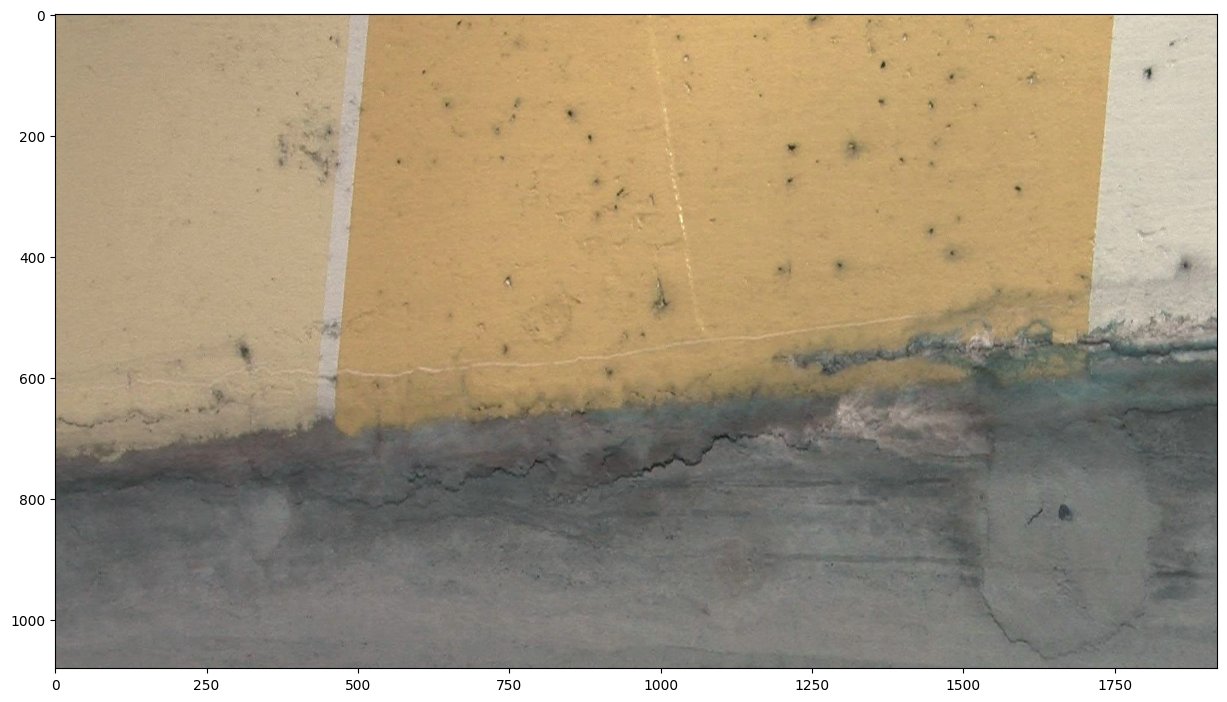

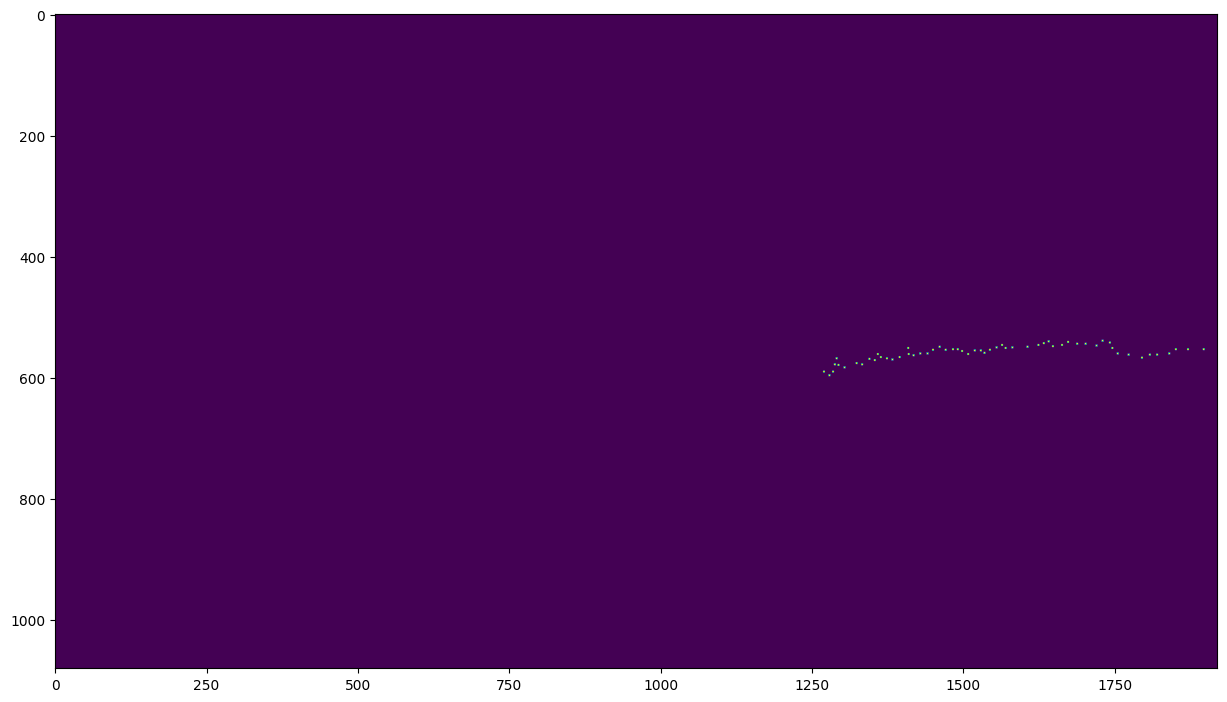

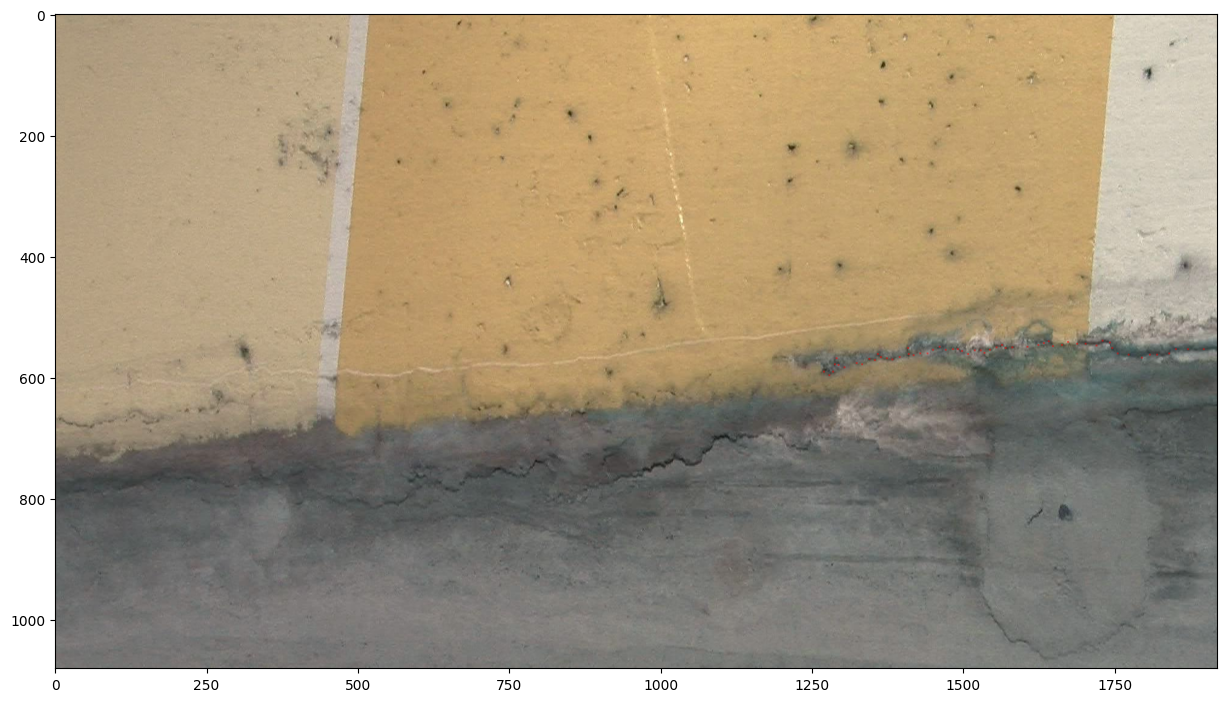

In [25]:
idx = 2431

path2img = img_paths[idx]
path2label = path2img.replace('1.원천데이터', '2.라벨링데이터').replace('.jpg', '.json')

# read json 
with open(path2label, 'r') as f:
    label = json.load(f)
    

# read image
img = cv2.imread(path2img)
# show image
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()


# show segmentation 

mask   = np.zeros(img.shape[:2], dtype=np.uint8)
points = np.array(label['image']['annotations'][0]['points'])
points = img.shape[:2][::-1]  - points

print()
for x,y in points:
    # print(x,y)
    mask[y-1:y+2,x-1:x+2] = 255

plt.figure(figsize=(15,15))
plt.imshow(mask)
plt.show()


# cv2.fillPoly(mask, [points], (255,255,255))

# apply mask on image by changing color of masked area
result = img.copy()
result[mask==0] = img[mask==0]
result[mask!=0] = img[mask!=0] * 0.5 + np.array([255,0,0]) * 0.5

# show result
plt.figure(figsize=(15,15))
plt.imshow(result)
plt.show()



In [43]:
# label['image']['annotations'][0]['label'], label['image']['annotations'][0]['points'], label['image']['annotations'][0]['labelNum'], label['image']['annotations'][0]['shape']

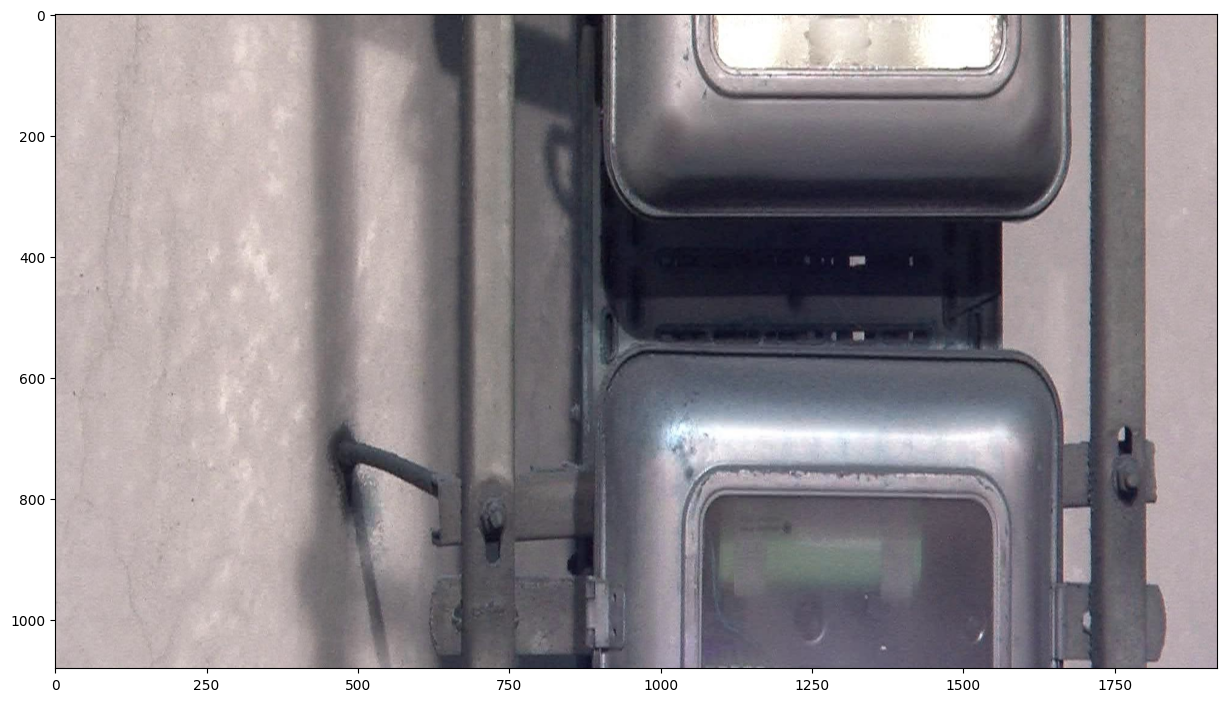

1
[{'label': 'crack', 'labelNum': 0, 'points': [[1787, 1039], [1788, 1019], [1797, 996], [1806, 987], [1812, 976], [1818, 956], [1812, 934], [1804, 908], [1812, 896], [1816, 864], [1821, 837], [1822, 794], [1828, 768], [1831, 737], [1836, 707], [1837, 683], [1843, 651], [1837, 627], [1829, 599], [1823, 578], [1829, 556], [1827, 536], [1817, 531], [1828, 526], [1841, 517], [1854, 501], [1861, 487], [1873, 454], [1877, 434], [1874, 402], [1874, 378], [1871, 353], [1872, 333], [1873, 307], [1887, 273], [1868, 272], [1854, 258], [1837, 247], [1821, 237], [1821, 199], [1812, 182], [1804, 169], [1798, 151], [1794, 121], [1793, 104], [1789, 91], [1781, 82], [1776, 68], [1772, 59], [1762, 38]], 'shape': 'Polyline', 'width': '0.3mm 초과, 0.5mm 이하'}]


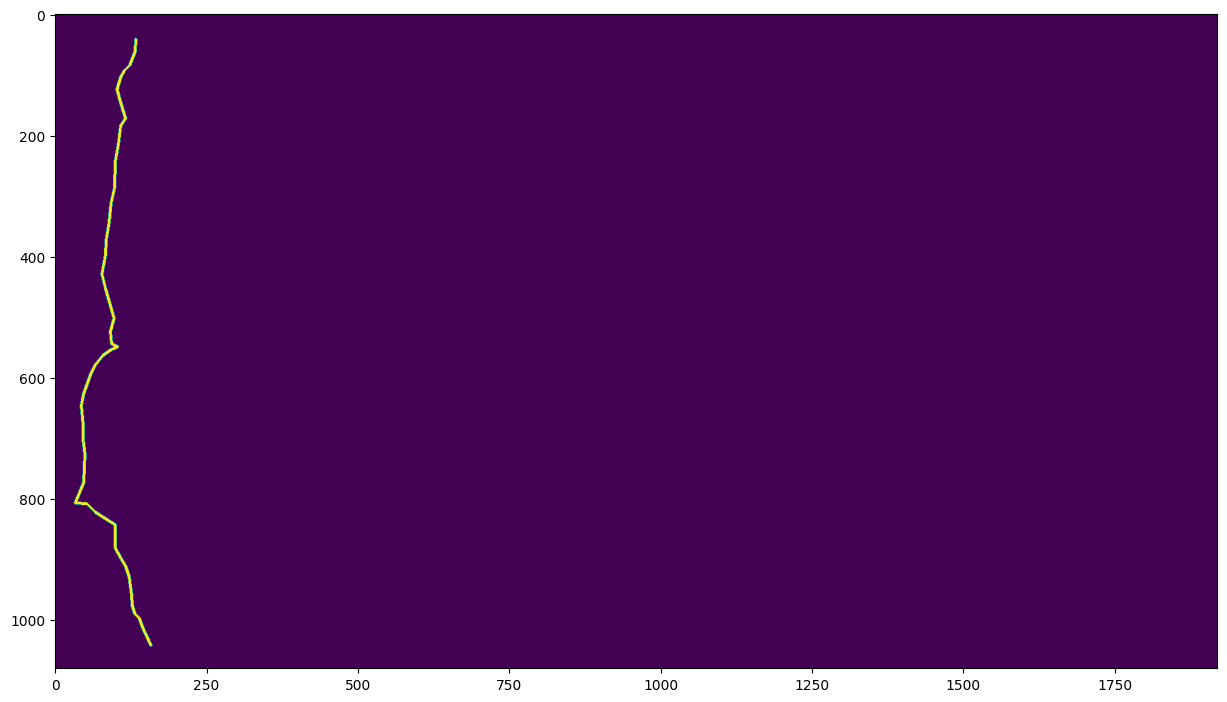

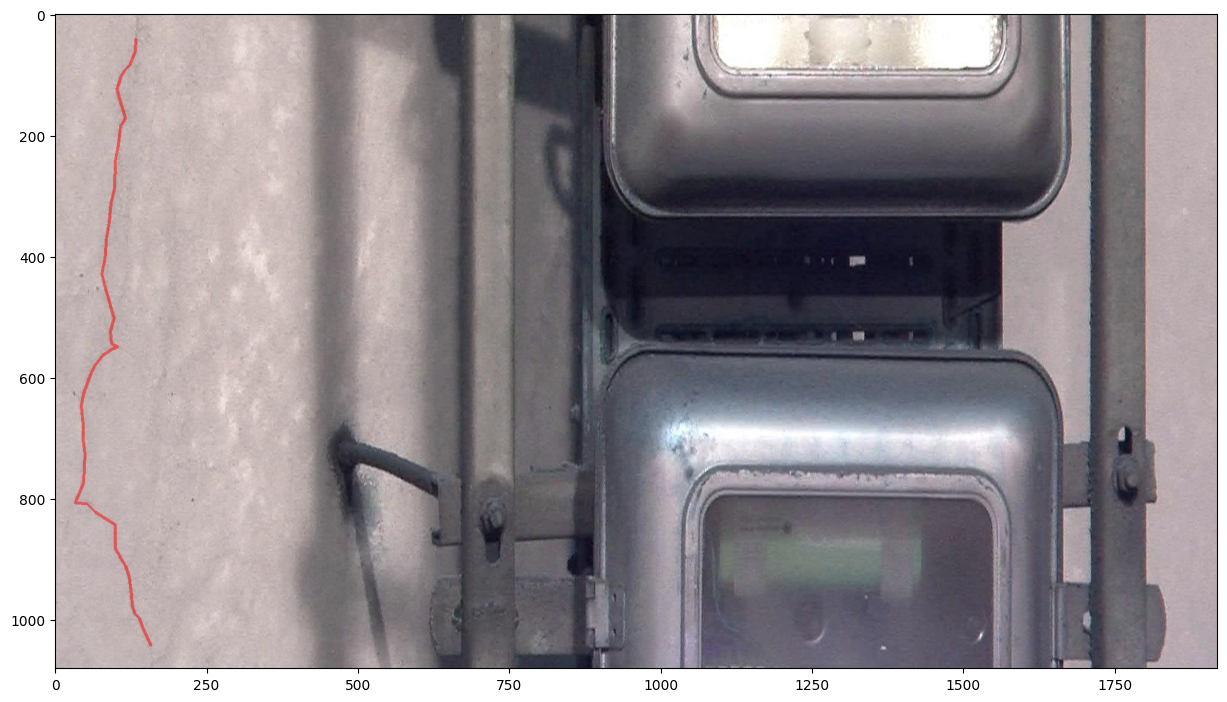

In [67]:
# idx = 2000, 3000, 2431, 3003
idx = 124

path2img = img_paths[idx]
path2label = path2img.replace('1.원천데이터', '2.라벨링데이터').replace('.jpg', '.json')

# read json 
with open(path2label, 'r') as f:
    label = json.load(f)
    

# read image
img = cv2.imread(path2img)
# show image
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()


# show segmentation 

mask   = np.zeros(img.shape[:2], dtype=np.uint8)
print(len(label['image']['annotations']))
print(label['image']['annotations'])
for i in range(len(label['image']['annotations'])):
    points = np.array(label['image']['annotations'][i]['points'])
    points = img.shape[:2][::-1]  - points

    # make line using points
    for i in range(len(points)-1):
        p1 = points[i]
        p2 = points[i+1]
        cv2.line(mask, tuple(p1), tuple(p2), 255, 3)

    # for x,y in points:
    #     # print(x,y)
    #     mask[y-1:y+2,x-1:x+2] = 255

plt.figure(figsize=(15,15))
plt.imshow(mask)
plt.show()


# cv2.fillPoly(mask, [points], (255,255,255))

# apply mask on image by changing color of masked area
result = img.copy()
result[mask==0] = img[mask==0]
result[mask!=0] = img[mask!=0] * 0.5 + np.array([255,0,0]) * 0.5

# show result
plt.figure(figsize=(15,15))
plt.imshow(result)
plt.show()

